In [2]:
from math import ceil, sqrt, atan2

def getNumberOfMirror(dimensions, your_position, distance):
    """
    return number of copies needed on each side
    """
    number_x_axis = int(ceil(float(your_position[0] + distance) / dimensions[0]))
    number_y_axis = int(ceil(float(your_position[1] + distance) / dimensions[1]))
    return [number_x_axis, number_y_axis]

def getAllPosition(dimensions, original_position, number_x_axis, number_y_axis, num):
    """
    return all posible mirrored position and original position by combining all posible
    x and y position in which num indicates player or guard, 1 for player and 9 for guard
    """
    # lists for containing all posible position in x or y axis
    all_x = []
    all_y = []
    
    # all possible points in x-axis
    for i in range(0, number_x_axis+1, 1):
        if i%2:
            pos_x = (dimensions[0] - original_position[0]) + dimensions[0] * i
            neg_x = (dimensions[0] - original_position[0]) + dimensions[0] * i * -1
        else:
            pos_x = original_position[0] + dimensions[0] * i
            neg_x = original_position[0] + dimensions[0] * i * -1
        all_x.extend([pos_x, neg_x])
    # remove repetition of an original point
    all_x.pop(0)
    
    # all possible points in x-axis
    for i in range(0, number_y_axis+1, 1):
        if i%2:
            pos_y = (dimensions[1] - original_position[1]) + dimensions[1] * i
            neg_y = (dimensions[1] - original_position[1]) + dimensions[1] * i * -1
        else:
            pos_y = original_position[1] + dimensions[1] * i
            neg_y = original_position[1] + dimensions[1] * i * -1
        all_y.extend([pos_y, neg_y])
    # remove repetition of an original point
    all_y.pop(0)
    return [[x, y, num] for x in all_x for y in all_y]

def getR(all_position, original_position, distance):
    """
    add a collumn indicating distance to player's original position
    """
    x0 = original_position[0]
    y0 = original_position[1]
    for position in all_position:
        r = sqrt((position[0] - x0)**2 + (position[1] - y0)**2)
        position.append(r)

def getAtan(all_position, original_position):
    """
    add a collumn indicating angle to player's original position in rad
    """
    x0 = original_position[0]
    y0 = original_position[1]
    for position in all_position:
        x = position[0] - x0
        y = position[1] - y0
        arctan = atan2(y, x)
        position.append(arctan)
    
def filHit(all_player, all_guard, distance):
    """
    filter out all unhit positions and return hit positions in term
    target: dict = {angle: [x, y, num, r, angle]}
    idea from https://peter-ak.github.io/2020/05/10/Brining_a_gun_to_a_guard_fight.html
    """
    all_position = all_player + all_guard
    target = {}
    for position in all_position:
        dist = position[3]
        angle = position[4]
        case_a = distance >= dist > 0
        case_b = angle not in target
        case_c = angle in target and dist < target[angle][3]
        if case_a and (case_b or case_c):
            target[angle] = position
    return target
    
def findAns(dict):
    """
    return an answer by counting through dictionary
    """
    ans = 0
    for key in dict:
        if dict[key][2] == 9:
            ans += 1
    return ans

def solution(dimensions, your_position, guard_position, distance):    
    number_mirror = getNumberOfMirror(dimensions, your_position, distance)
    all_player = getAllPosition(dimensions, your_position, number_mirror[0], number_mirror[1], 1)
    all_guard = getAllPosition(dimensions, guard_position, number_mirror[0], number_mirror[1], 9)
    getR(all_player, your_position, distance)
    getR(all_guard, your_position, distance)
    getAtan(all_player, your_position)
    getAtan(all_guard, your_position)
    target = filHit(all_player, all_guard, distance)
    return findAns(target)
def test():
    assert solution([3, 2], [1, 1], [2, 1], 4) == 7
    assert solution([2, 5], [1, 2], [1, 4], 11) == 27
    assert solution([23, 10], [6, 4], [3, 2], 23) == 8
    assert solution([1250, 1250], [1000, 1000], [500, 400], 10000) == 196
    assert solution([10, 10], [4, 4], [3, 3], 5000) == 739323
    assert solution([3, 2], [1, 1], [2, 1], 7) == 19
    assert solution([2, 3], [1, 1], [1, 2], 4) == 7
    assert solution([3, 4], [1, 2], [2, 1], 7) == 10
    assert solution([4, 4], [2, 2], [3, 1], 6) == 7
    assert solution([300, 275], [150, 150], [180, 100], 500) == 9
    assert solution([3, 4], [1, 1], [2, 2], 500) == 54239
    print('done')
test()

done


In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
dimension = [3,2]
your_position = [1,1]
guard_position = [2,1]
distance = 4
n = getNumberOfMirror(dimension, your_position, distance)
all_player = getAllPosition(dimension, your_position, n[0], n[1], 1)
all_player = list(map(list, zip(*all_player)))
all_guard = getAllPosition(dimension, guard_position, n[0], n[1], 9)
all_guard = list(map(list, zip(*all_guard)))


<function matplotlib.pyplot.show(close=None, block=None)>

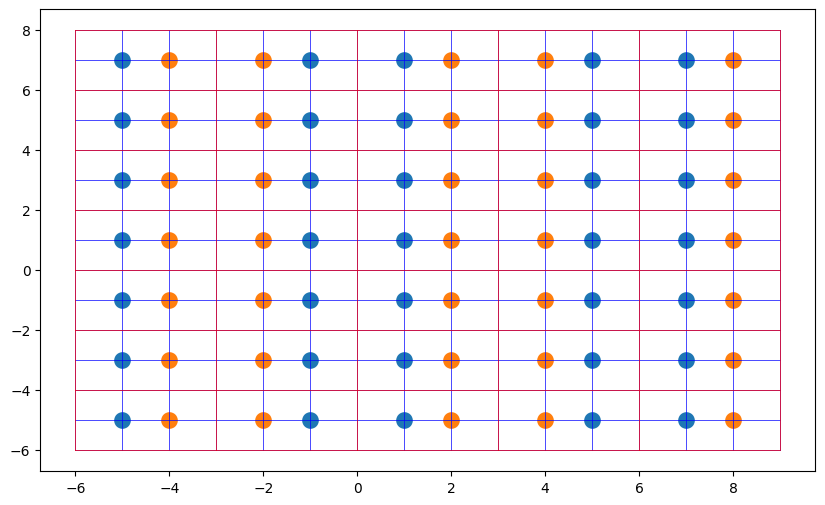

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(all_player[0], all_player[1], marker='o', linewidths=6)
plt.scatter(all_guard[0], all_guard[1], marker='o', linewidths=6)
for i in range(-6, 9):
    plt.plot([-6,9],[i,i],c = 'blue', lw = 0.5)
    plt.plot([i,i],[-6,8],c = 'blue', lw = 0.5)
for i in range(-3, 5):
    plt.plot([-6,9], [i*2,i*2],c = 'red', lw = 0.5)
plt.plot([9,9], [-6,8],c = 'blue', lw = 0.5)
for i in range(-2, 4):
    plt.plot([i*3,i*3], [-6,8],c = 'red', lw = 0.5)

# plt.xlim(0,3)
# plt.ylim(0,2)
plt.show

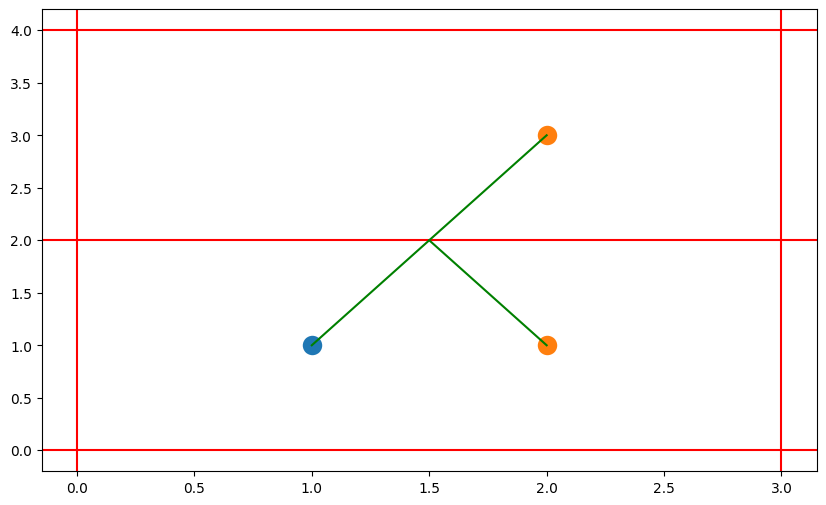

In [7]:
plt.figure(figsize=(10,6))
plt.scatter([1], [1], marker='o', linewidths=8)
plt.scatter([2,2], [1,3], marker='o', linewidths=8)
[plt.axhline(y=i, c='red') for i in [0,2,4]]
[plt.axvline(x=i, c='red') for i in [0,3]]
plt.plot([1,2],[1,3], c='green')
plt.plot([1.5,2],[2,1], c='green')
